### Defining a Predictive Problem

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [27]:
fats = pd.read_csv('Fat_Supply_Quantity_Data.csv')

In [28]:
fats.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,Milk - Excluding Butter,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,0.0163,8.2803,0.3103,1.0452,0.1960,0.2776,0.0490,0.0980,0.0,0.0,0.7513,28.3684,17.0831,0.3593,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.0,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,0.0170,17.7576,0.2933,3.1622,0.1148,0.0000,0.0510,0.5270,0.0,0.0,0.9181,17.9998,9.2443,0.6503,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,0.0439,8.0934,0.1067,1.1983,0.2698,0.1568,0.1129,0.2886,0.0,0.0,0.8595,35.5857,27.3606,0.5145,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,0.0,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,0.0308,1.2309,0.1539,3.9902,0.3282,0.0103,0.7078,0.1128,0.0,0.0,0.0308,34.7010,22.4638,0.1231,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,0.0,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,0.0898,6.6607,0.1347,1.3579,0.0673,0.3591,0.0449,1.0549,0.0,0.0,0.2020,22.2995,14.4436,0.2469,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


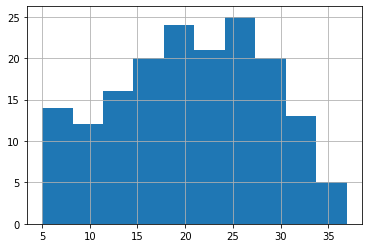

In [30]:
fats['Animal Products'].hist()

In [39]:
px.scatter(data_frame = fats, x = 'Animal Products', y = 'Obesity' )

In [36]:
px.scatter?

### Using an API and Text Classification

In [19]:
import requests
import pandas as pd

In [40]:
r = requests.get('https://api.pushshift.io/reddit/search/comment/?subreddit=nottheonion&size=300')
r2 = requests.get('https://api.pushshift.io/reddit/search/comment/?subreddit=worldnews&size=300')

In [21]:
r

<Response [200]>

In [41]:
not_the_onion = r.json()

In [42]:
not_the_onion.keys()

dict_keys(['data'])

In [47]:
bodies = [i['body'] for i in not_the_onion['data']]

In [45]:
data = pd.DataFrame(bodies)

In [46]:
data['subreddit'] = 'nottheonion'

In [48]:
bodies2 = [i['body'] for i in r2.json()['data']]

In [49]:
data2 = pd.DataFrame(bodies2)
data2['subreddit'] = 'worldnews'

In [53]:
df = pd.concat((data, data2)).reset_index(drop = True)

In [56]:
df.head()

,0,subreddit
0,I didn’t use a lot of words together that mean...,nottheonion
1,bUT mUh FrEEduMS!,nottheonion
2,What pathetic mod is going through each commen...,nottheonion
3,Papa John's Pizza sucks ass. New York style pi...,nottheonion
4,Anyone declaring themselves non-binary is a by...,nottheonion


In [54]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
cvect = CountVectorizer(max_features = 200)

In [61]:
X = pd.DataFrame(cvect.fit_transform(df[0]).toarray(), columns = cvect.get_feature_names_out())

In [62]:
y = df['subreddit']

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
clf = LogisticRegression()

In [65]:
clf.fit(X, y)

LogisticRegression()

In [66]:
clf.score(X, y)

0.93